#                           Machine Learning Churn prediction 

## 1. Hypothesis

Null Hypothesis : There is no significate effect of being senior citizen for a company to have more churn customers

Alternative Hypothesis : There is significate effect of being senior citizen for a company to have more churn customers

In [12]:
import scipy.stats as stats
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
test = pd.read_csv("C:/Users/hp/Documents/Azubi_2/project_2/Customer_chrn_prediction/data/testing_data.csv")

In [5]:
test.SeniorCitizen

0        No
1        No
2        No
3        No
4        No
       ... 
5038     No
5039     No
5040     No
5041    Yes
5042     No
Name: SeniorCitizen, Length: 5043, dtype: object

In [6]:
citizen = test.SeniorCitizen

In [7]:
citizen = citizen.apply(lambda x: str(x).replace("No", "0"))
citizen = citizen.apply(lambda x: str(x).replace("Yes", "1"))

In [18]:
citizen = citizen.astype(int)

In [19]:
print(stats.shapiro(churn))

ShapiroResult(statistic=0.5507321357727051, pvalue=0.0)


In [9]:
churn = test.Churn

In [10]:
churn = churn.apply(lambda x: str(x).replace("No", "0"))
churn = churn.apply(lambda x: str(x).replace("Yes", "1"))

In [16]:
churn = churn.astype(int)

In [17]:
print(stats.shapiro(churn))

ShapiroResult(statistic=0.5507321357727051, pvalue=0.0)


C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\_morestats.py:1800: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


In [20]:
print(stats.levene(churn, citizen))

LeveneResult(statistic=160.20801906037184, pvalue=1.927831898987456e-36)


In [21]:
t_stat, p_value = stats.ttest_ind(citizen, churn) #two sample t-test
print(t_stat, p_value)

-12.65733064513888 1.927831899002937e-36


In [25]:
alpha = 0.05
if p_value < alpha:
    print("Reject HYpothesis")
else:
    print("Fail to reject Null Hypothesis")

Reject HYpothesis


## According to our result we can conclude that there is an effect on being a senior citizen customer or not for the company to loose its users. We recommend the organization to look for senior citiznes to be its users.

In [58]:
seniorcitizen = test[test.SeniorCitizen == "Yes"]
leave_senior = seniorcitizen[seniorcitizen.Churn == "Yes"]["Churn"].count()


In [71]:
not_seniorcitizen = test[test.SeniorCitizen == "No"]
not_seniorcitizen = not_seniorcitizen[not_seniorcitizen.Churn == "Yes"]["Churn"].count()

In [74]:
list_citizen = ["Senior", "Not Senior"]
list_num = [leave_senior, not_seniorcitizen]

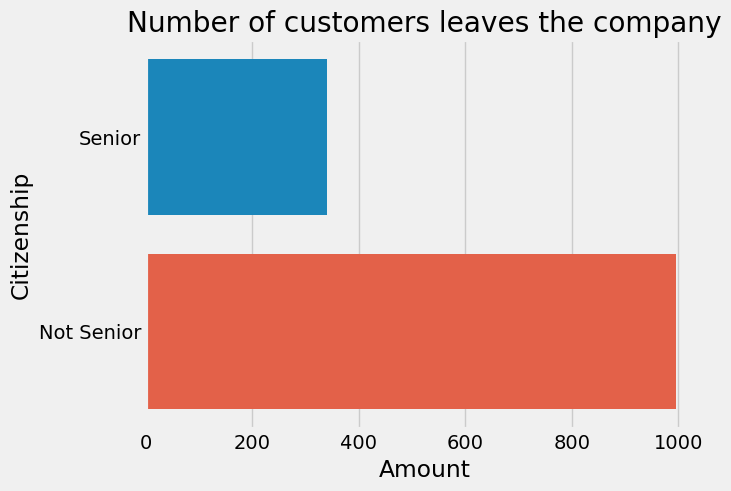

In [78]:
sns.barplot(x = list_num, y= list_citizen )

# Show plot

plt.title("Number of customers leaves the company")
plt.xlabel("Amount")
plt.ylabel("Citizenship")
plt.show()

In [44]:
test.columns

Index(['Column1', 'customerID', 'gender', 'SeniorCitizen', 'Partner',
       'Dependents', 'tenure', 'PhoneService', 'MultipleLines',
       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges', 'TotalCharges',
       'Churn'],
      dtype='object')

## 1. How gender is distributed ?

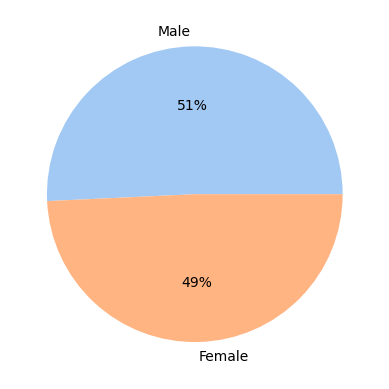

In [45]:
male = ( test["gender"] == "Male" ).sum()
female = ( test["gender"] == "Female" ).sum()

data = [male, female]
labels = ['Male', "Female"]

#define Seaborn color palette to use
colors = sns.color_palette('pastel')[0:5]

#create pie chart
plt.pie(data, labels = labels, colors = colors, autopct='%.0f%%')
plt.show()

The gender distribution has no a big differnce, The data is a balanced with gender

## 2. How many customers are senior citizen ?

In [46]:
test.SeniorCitizen.unique()

array(['No', 'Yes'], dtype=object)

In [49]:
test.SeniorCitizen.count()

5043

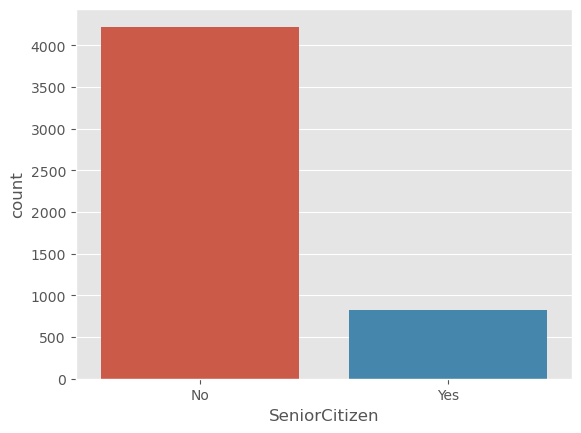

In [62]:
sns.countplot(x="SeniorCitizen", data=test)

plt.style.use("fivethirtyeight")

plt.show()


More than 4000 customers are not senior Citizens and 800 are seniors. This shows a high variance.

In [63]:
test.columns

Index(['Column1', 'customerID', 'gender', 'SeniorCitizen', 'Partner',
       'Dependents', 'tenure', 'PhoneService', 'MultipleLines',
       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges', 'TotalCharges',
       'Churn'],
      dtype='object')

## 3. How many customers are using different types of services from the company ?

In [103]:
MultipleLines = ( test["MultipleLines"] == "Yes" ).sum()
TechSupport = ( test["TechSupport"] == "Yes" ).sum()
OnlineSecurity = ( test["OnlineSecurity"] == "Yes" ).sum()
DeviceProtection = ( test["DeviceProtection"] == "Yes" ).sum()
OnlineBackup = ( test["OnlineBackup"] == "Yes" ).sum()
StreamingTV = ( test["StreamingTV"] == "Yes" ).sum()
Churn = ( test["Churn"] == "Yes" ).sum()

In [104]:
OnlineBackup

1732

In [105]:
list_item = ["MultipleLines", "TechSupport", "OnlineSecurity", "DeviceProtection", "OnlineBackup", "StreamingTV", "Churn"]

In [106]:
list_num = [MultipleLines, TechSupport, OnlineSecurity, DeviceProtection, OnlineBackup, StreamingTV, Churn]

In [107]:
list_item

['MultipleLines',
 'TechSupport',
 'OnlineSecurity',
 'DeviceProtection',
 'OnlineBackup',
 'StreamingTV',
 'Churn']

In [108]:
test.StreamingTV

0        No
1        No
2        No
3        No
4        No
       ... 
5038    Yes
5039    Yes
5040     No
5041     No
5042    Yes
Name: StreamingTV, Length: 5043, dtype: object

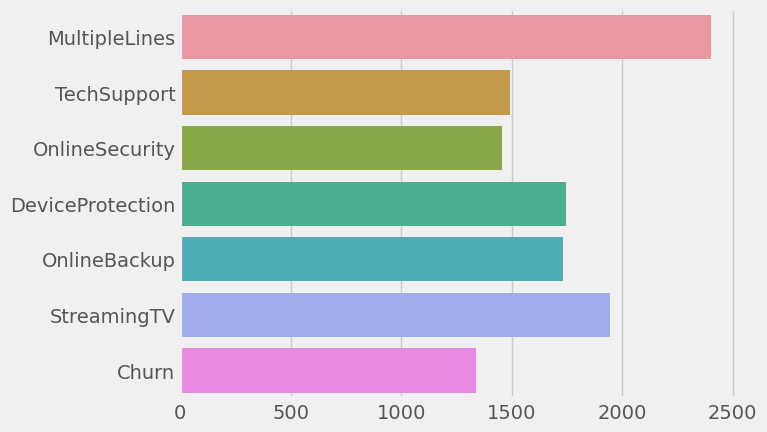

In [109]:
sns.barplot(x = list_num, y= list_item)

# Show plot
plt.show()


## 4. How many customers churn from the company ?

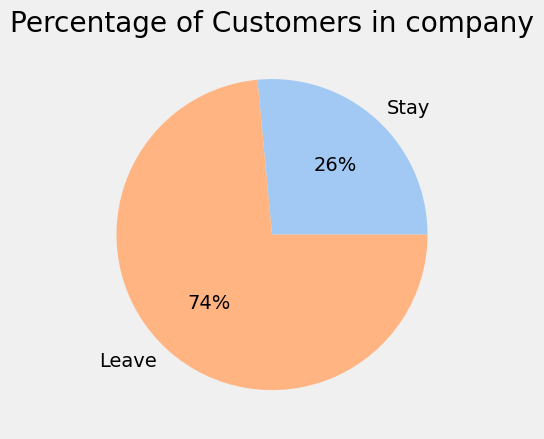

In [79]:
Stay = ( test["Churn"] == "Yes" ).sum()
Leave = ( test["Churn"] == "No" ).sum()

data = [Stay, Leave]
labels = ['Stay', "Leave"]

#define Seaborn color palette to use
colors = sns.color_palette('pastel')[0:5]

#create pie chart
plt.pie(data, labels = labels, colors = colors, autopct='%.0f%%')
plt.title("Percentage of Customers in company")
plt.show()

The company's data shows that 75% of customers are leavning. More than half percent of them have not internet service, techsupport and other benefits from the organization

## 5. What is Average Month charges ?


In [114]:
mean  = test["MonthlyCharges"].mean()
print("Averge monthly charge is : ", round(mean,2))

Averge monthly charge is :  65.09


## 6. What is total charge the company gained ?

In [124]:
#test.TotalCharges = test.TotalCharges.apply(lambda x : x.replace("","0"))
#test.TotalCharges = test.TotalCharges.apply(lambda x : x.replace('0 0',"0"))


test.TotalCharges =  test.TotalCharges.astype(float)

In [126]:
total  = test["TotalCharges"].mean()
print("Averge Total charge is : ", round(total,2))

Averge Total charge is :  1080825257155.01


In [128]:
test.InternetService

0               DSL
1               DSL
2               DSL
3               DSL
4       Fiber optic
           ...     
5038            DSL
5039    Fiber optic
5040            DSL
5041    Fiber optic
5042    Fiber optic
Name: InternetService, Length: 5043, dtype: object

## 7. What type of Internet service is used by customers ?

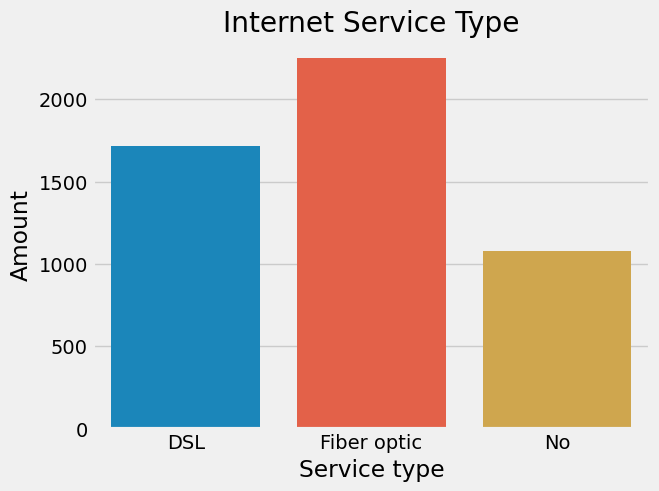

In [83]:
sns.countplot(x="InternetService", data=test)

plt.style.use("fivethirtyeight")

plt.title("Internet Service Type")
plt.xlabel("Service type")
plt.ylabel("Amount")
plt.show()
